In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# library dan data

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support, accuracy_score
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import resnet_v2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!kaggle datasets download -d muhammadsajad/periapical-xrays

Dataset URL: https://www.kaggle.com/datasets/muhammadsajad/periapical-xrays
License(s): unknown
 96% 148M/153M [00:02<00:00, 71.0MB/s]
100% 153M/153M [00:02<00:00, 67.3MB/s]


In [ ]:

# Buat folder untuk ekstraksi dataset
dataset_dir = "periapical_xrays"
if not os.path.exists(dataset_dir):
    os.makedirs(dataset_dir)

# Ekstrak file ZIP ke folder yang ditentukan
zip_file = "periapical-xrays.zip"
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(dataset_dir)

print("Dataset berhasil diunduh dan diekstrak.")

Dataset berhasil diunduh dan diekstrak.


## EDA

Kelas yang tersedia: ['Primary Endo with Secondary Perio', 'Primary Endodontic Lesion', 'Primary Periodontal Lesion', 'True Combined Lesions']


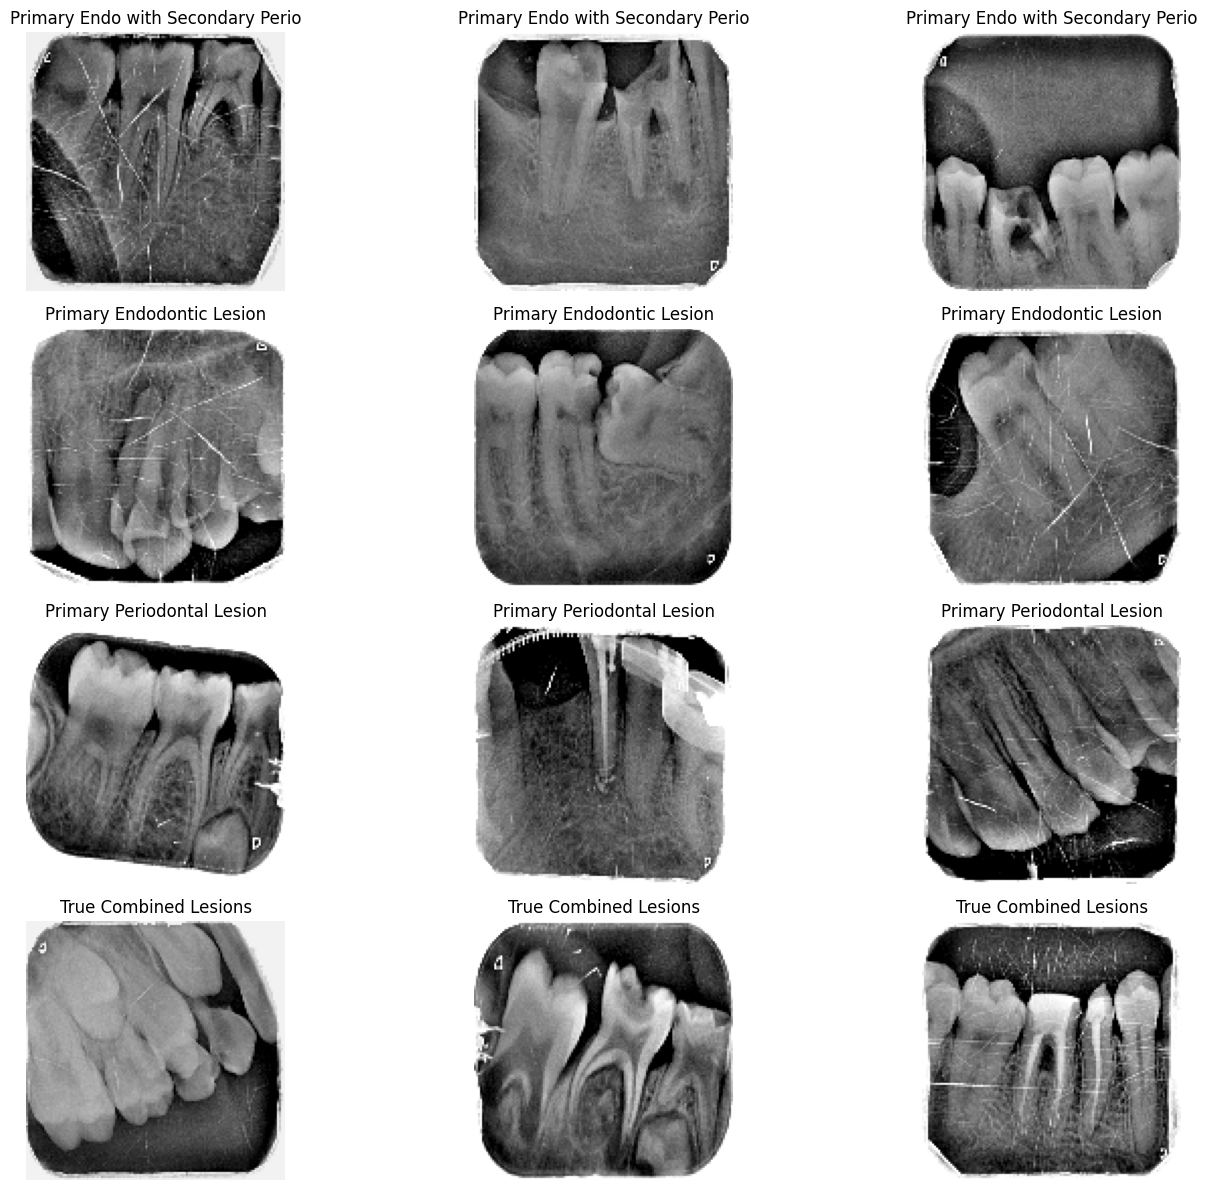

In [ ]:
import os
# Path ke folder utama dataset
dataset_path = "/kaggle/input/periapical4data/Periapical_Xrays4x2"  # Sesuaikan dengan struktur dataset

# Mendapatkan daftar kelas (subfolder dalam folder dataset)
classes = sorted(os.listdir(dataset_path))
print(f"Kelas yang tersedia: {classes}")

# Visualisasi beberapa gambar dari setiap kelas
def visualize_images(dataset_path, classes, num_images=3):
    plt.figure(figsize=(15, len(classes) * 3))
    for i, cls in enumerate(classes):
        class_path = os.path.join(dataset_path, cls)
        images = os.listdir(class_path)[:num_images]  # Ambil sejumlah gambar
        for j, img_name in enumerate(images):
            img_path = os.path.join(class_path, img_name)
            img = tf.keras.utils.load_img(img_path, target_size=(128, 128))  # Resize ke 128x128
            plt.subplot(len(classes), num_images, i * num_images + j + 1)
            plt.imshow(img)
            plt.axis('off')
            plt.title(cls)
    plt.tight_layout()
    plt.show()

# Tampilkan gambar
visualize_images(dataset_path, classes)



In [ ]:
# Periksa distribusi jumlah gambar per kelas
def check_distribution(dataset_path, classes):
    class_counts = {cls: len(os.listdir(os.path.join(dataset_path, cls))) for cls in classes}
    print("Distribusi jumlah gambar per kelas:")
    for cls, count in class_counts.items():
        print(f"{cls}: {count} gambar")
    return class_counts

class_counts = check_distribution(dataset_path, classes)


Distribusi jumlah gambar per kelas:
Primary Endo with Secondary Perio: 244 gambar
Primary Endodontic Lesion: 248 gambar
Primary Periodontal Lesion: 236 gambar
True Combined Lesions: 262 gambar


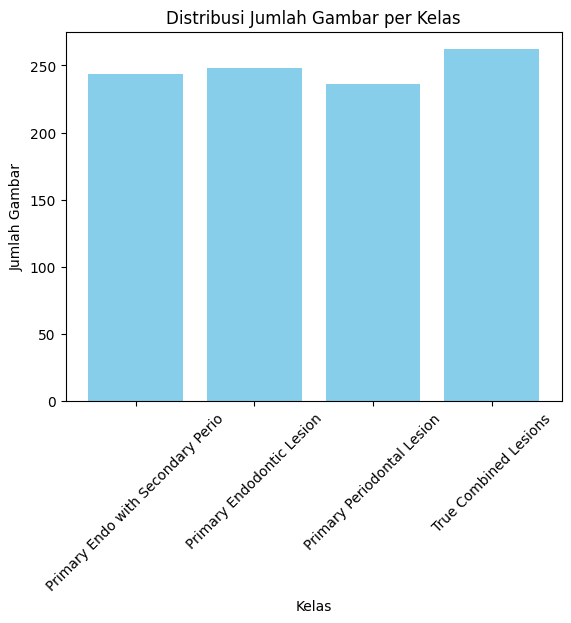

In [ ]:
# Visualisasi distribusi dengan bar chart
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Gambar')
plt.title('Distribusi Jumlah Gambar per Kelas')
plt.xticks(rotation=45)
plt.show()
